___
# *Machine Learning Model: Life Expectancy Prediction*
___

### Importing the Libraries 

In [765]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [766]:
df = pd.read_csv("C:/Users/ubaid khan/Desktop/ML & DS/PROJECT/Life Expectancy/Life Expectancy Data.csv")

In [767]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


___

### Data Preprocessing!

In [768]:
df.select_dtypes(include='object')
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')
df_objs = pd.get_dummies(df_objs,drop_first=True)

### Statistical Info

In [769]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2491.000000,2.287000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7480.216346,1.274858e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14268.059193,6.099918e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.185266,1.960335e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1764.973870,1.388115e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5903.413690,7.417429e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


 ___

## Exploratory Data Analysis

*We will try fixing the data sets, but will also drop a substantial amount as these are factual information and not easy to predict through assumptions. And if you're thinking- "Hey, information like a country's population can be easily found on the Internet, why assume / predict / drop it?" Then, real-world data sets that a data scientist deals with in a company are much much bigger than this! And its just not practical to manually fill in 150-400 rows of data.*

<AxesSubplot:ylabel='count'>

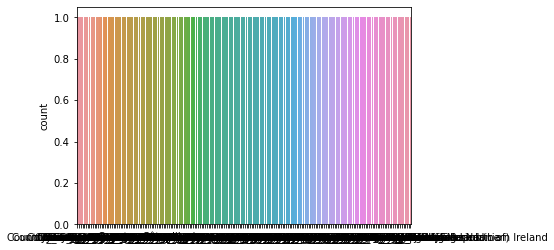

In [770]:
sns.countplot(df_objs.columns, dodge=True)

<AxesSubplot:xlabel='Status', ylabel='count'>

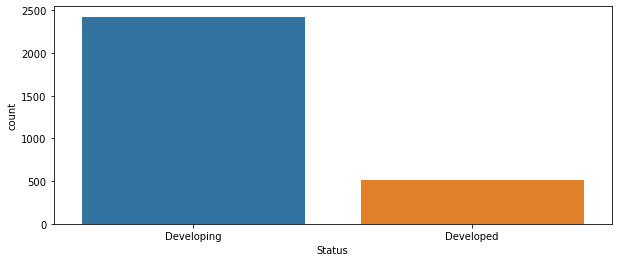

In [669]:
plt.figure(figsize=(10,4))
sns.countplot(x='Status',data=df)

In [772]:
df_nums

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:>

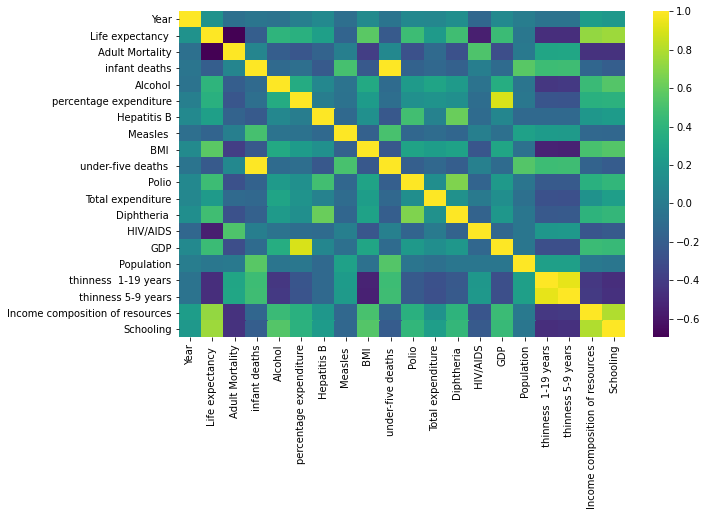

In [794]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="viridis")

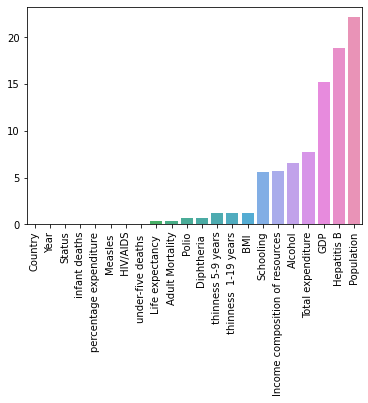

In [684]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

___

### This shows that Life Expectancy & Adult Mortality probably has the same missing rows! 

In [685]:
df[df['Adult Mortality'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


<AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy '>

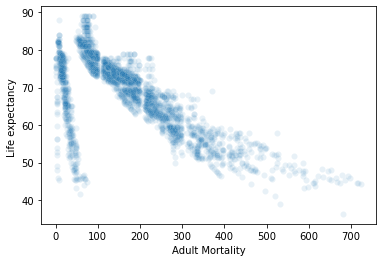

In [686]:
sns.scatterplot(x='Adult Mortality',y='Life expectancy ',data=df, alpha=0.1)

In [687]:
df = df.dropna(axis=0,subset= ['Adult Mortality'])

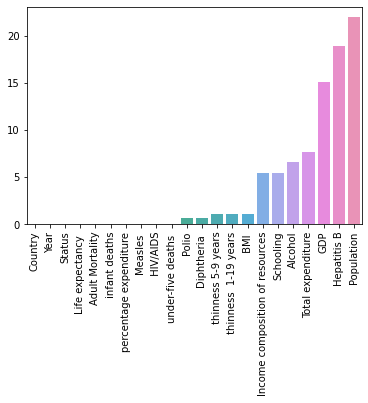

In [688]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [689]:
df = df.dropna(axis=0,subset= ['Polio','Diphtheria ']) #Dropping rows of Diphtheria & Polio because they can't be assumptioned.

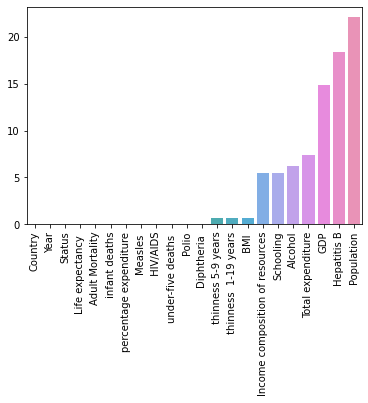

In [690]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [691]:
df = df.dropna(axis=0,subset= [' thinness  1-19 years'])

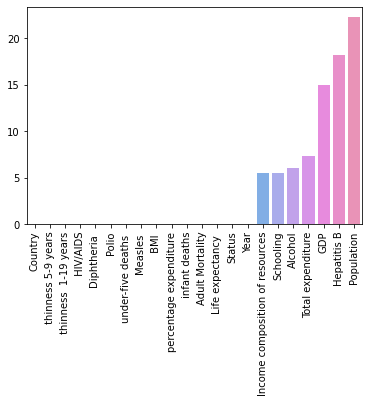

In [692]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [696]:
df = df.dropna(axis=0,subset= ['Income composition of resources'])

<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy '>

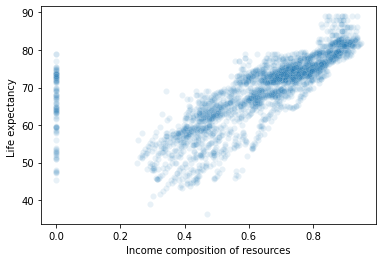

In [697]:
sns.scatterplot(x='Income composition of resources',y='Life expectancy ',alpha=0.1, data=df)

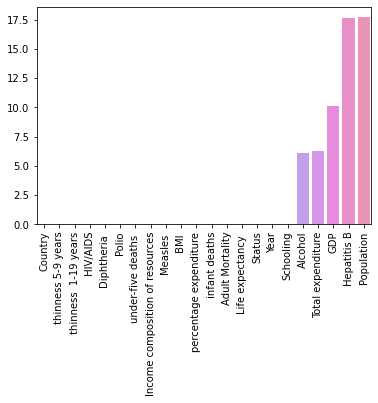

In [698]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Alcohol', ylabel='Life expectancy '>

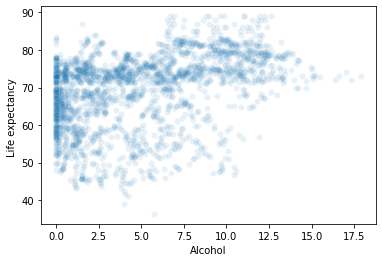

In [704]:
sns.scatterplot(x='Alcohol',y='Life expectancy ',alpha=0.1, data=df)

In [705]:
df['Alcohol'].mean()

4.550238095238117

In [706]:
df['Alcohol'].max()

17.87

In [707]:
df['Alcohol'] = df['Alcohol'].fillna(4.56)

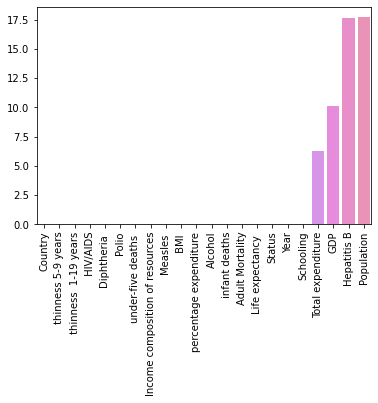

In [708]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [709]:
df[df['Total expenditure'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,4.56,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,4.56,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,4.56,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,4.56,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,4.56,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4.56,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,4.56,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,4.56,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,4.56,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [713]:
df['Total expenditure'] = df.groupby('Country')['Total expenditure'].transform(lambda val: val.fillna(val.mean()))

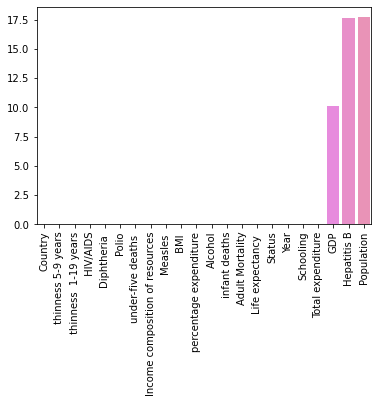

In [714]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [735]:
df[df['GDP'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
850,Eritrea,2015,Developing,64.7,255.0,5,4.56,0.0,95.000000,198,...,95.0,3.468667,95.0,0.4,NaN,2.071919e+06,8.4,8.2,0.418,5.0
851,Eritrea,2014,Developing,64.4,261.0,5,0.01,0.0,94.000000,127,...,94.0,3.340000,94.0,0.4,NaN,2.071919e+06,8.5,8.3,0.416,5.0
852,Eritrea,2013,Developing,64.0,266.0,6,0.01,0.0,94.000000,45,...,94.0,3.100000,94.0,0.5,NaN,2.071919e+06,8.6,8.4,0.414,5.0
853,Eritrea,2012,Developing,63.6,274.0,6,0.01,0.0,94.000000,194,...,94.0,2.980000,94.0,0.6,NaN,2.071919e+06,8.7,8.6,0.410,5.0
963,Gambia,2014,Developing,68.0,266.0,3,0.01,0.0,96.000000,1,...,97.0,7.340000,96.0,1.7,NaN,1.790000e+06,7.5,7.3,0.449,8.9
964,Gambia,2013,Developing,66.0,266.0,3,0.01,0.0,97.000000,0,...,96.0,6.490000,97.0,1.6,NaN,1.790000e+06,7.6,7.5,0.445,8.9
965,Gambia,2012,Developing,62.0,269.0,3,0.01,0.0,98.000000,0,...,98.0,6.120000,98.0,1.4,NaN,1.790000e+06,7.8,7.7,0.440,8.8
966,Gambia,2011,Developing,59.8,277.0,3,3.41,0.0,96.000000,0,...,95.0,6.240000,96.0,1.8,NaN,1.790000e+06,8.0,7.9,0.441,8.7
968,Gambia,2009,Developing,59.0,286.0,3,2.99,0.0,97.000000,0,...,97.0,5.850000,98.0,2.7,NaN,1.790000e+06,8.4,8.3,0.434,8.9
969,Gambia,2008,Developing,58.7,287.0,3,2.79,0.0,98.000000,0,...,96.0,5.950000,96.0,3.0,NaN,1.790000e+06,8.6,8.5,0.426,8.6


<AxesSubplot:xlabel='GDP', ylabel='Life expectancy '>

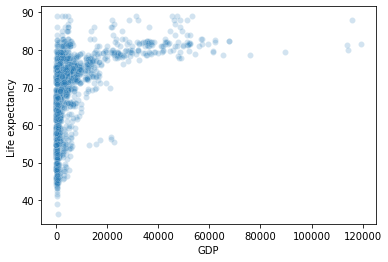

In [734]:
sns.scatterplot(x='GDP',y='Life expectancy ',data=df, alpha=0.2)

<AxesSubplot:xlabel='Population', ylabel='Life expectancy '>

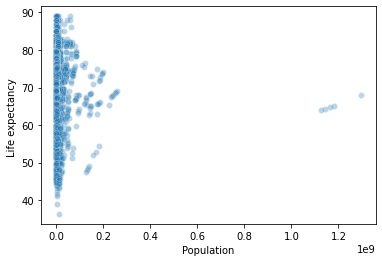

In [717]:
sns.scatterplot(x='Population',y='Life expectancy ',data=df, alpha=0.3)

In [718]:
df['Population'] = df.groupby('Country')['Population'].transform(lambda val: val.fillna(val.mean()))

<AxesSubplot:xlabel='Population', ylabel='Life expectancy '>

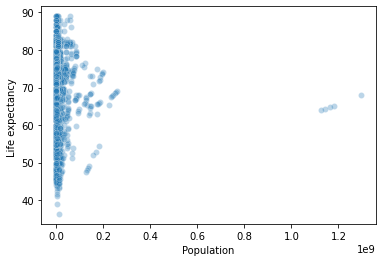

In [724]:
sns.scatterplot(x='Population',y='Life expectancy ',data=df, alpha=0.3)

In [725]:
df = df.dropna(axis=0,subset= ['Population'])

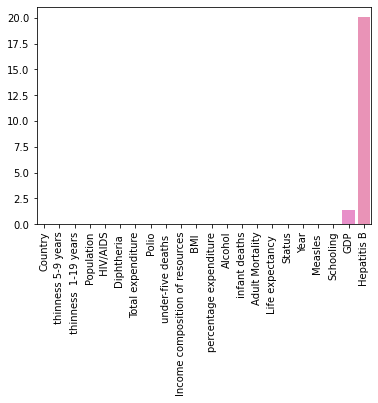

In [726]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Hepatitis B', ylabel='Life expectancy '>

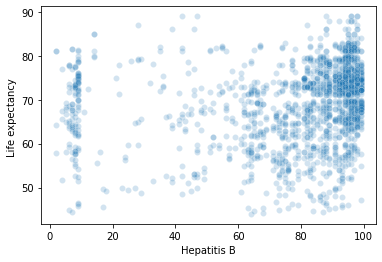

In [727]:
sns.scatterplot(x='Hepatitis B',y='Life expectancy ',data=df, alpha=0.2)

In [728]:
df['Hepatitis B'].describe()

count    1809.000000
mean       79.383085
std        25.444364
min         2.000000
25%        74.000000
50%        91.000000
75%        96.000000
max        99.000000
Name: Hepatitis B, dtype: float64

In [729]:
df['Hepatitis B'] = df.groupby('Country')['Hepatitis B'].transform(lambda val: val.fillna(val.mean()))

In [730]:
df[df['Hepatitis B'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
737,Denmark,2015,Developed,86.0,71.0,0,4.56,0.000000,NaN,9,...,93.0,7.822667,93.0,0.1,5314.64416,5683483.0,1.1,0.9,0.923,19.2
738,Denmark,2014,Developed,84.0,73.0,0,9.64,10468.762920,NaN,27,...,94.0,1.800000,94.0,0.1,62425.53920,5643475.0,1.1,0.9,0.926,19.2
739,Denmark,2013,Developed,81.0,75.0,0,9.50,10261.763000,NaN,17,...,94.0,11.250000,94.0,0.1,61191.19263,5614932.0,1.1,0.9,0.924,18.7
740,Denmark,2012,Developed,80.0,76.0,0,9.26,928.417079,NaN,2,...,94.0,1.980000,94.0,0.1,5857.52100,5591572.0,1.1,0.9,0.922,18.4
741,Denmark,2011,Developed,79.7,79.0,0,10.47,10251.108720,NaN,84,...,91.0,1.870000,91.0,0.1,61753.66700,557572.0,1.1,0.9,0.910,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,Switzerland,2004,Developed,81.0,69.0,0,10.55,9495.540576,NaN,39,...,95.0,1.960000,93.0,0.1,53255.97631,7389625.0,0.6,0.4,0.895,15.1
2533,Switzerland,2003,Developed,85.0,72.0,0,10.82,842.276809,NaN,574,...,95.0,1.930000,93.0,0.1,4796.56497,73391.0,0.6,0.5,0.889,15.0
2534,Switzerland,2002,Developed,84.0,74.0,0,10.85,6853.628494,NaN,0,...,95.0,1.610000,93.0,0.1,41336.72192,7284753.0,0.6,0.5,0.890,15.2
2535,Switzerland,2001,Developed,82.0,75.0,0,11.12,6478.346135,NaN,700,...,95.0,1.280000,93.0,0.1,38538.64447,7229854.0,0.7,0.5,0.888,15.2


In [732]:
df = df.dropna(axis=0,subset= ['Hepatitis B'])

In [736]:
df = df.dropna(axis=0,subset= ['GDP'])

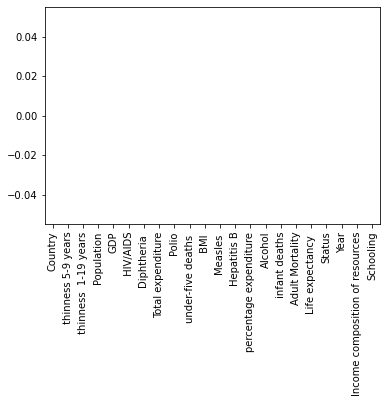

In [737]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

#### With this, we conclude the analysis. We tried utilizing a combination of Groupby transform, dropna, and fillna with mean!

___

# *Linear Regression Model (Grid Search)*

### Creating Dummy Variables from Object Columns

In [739]:
df.select_dtypes(include='object')
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

df_objs = pd.get_dummies(df_objs,drop_first=True)

df = pd.concat([df_nums,df_objs],axis=1)

### Formatting Data

In [740]:
## CREATE X and y
X = df.drop('Life expectancy ',axis=1)
y = df['Life expectancy ']

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [741]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

base_elastic_model = ElasticNet()

param_grid = {'alpha':[.0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9,1,5,10,50,100],
              'l1_ratio':[.0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9, .95, .99, 1]}

# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5)

grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0091, 0.0099, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.7, 0.9, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.0091, 0.0099, 0.01, 0.02, 0.03, 0.04,
                                      0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                      0.3, 0.4, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [742]:
grid_model.best_estimator_

ElasticNet(alpha=0.0091, l1_ratio=0.0091)

In [743]:
grid_model.best_params_

{'alpha': 0.0091, 'l1_ratio': 0.0091}

### Using Best Model From Grid Search

In [745]:
y_pred = grid_model.predict(X_test)

In [746]:
from sklearn.metrics import mean_squared_error

In [445]:
mean_squared_error(y_test,y_pred) #Try-2 (Tuned the hyperparameters)

5.412810635610318

In [451]:
mean_squared_error(y_test,y_pred) #Try-3 (Tuned the hyperparameters)

5.056212640613265

In [458]:
mean_squared_error(y_test,y_pred) #Try-4! (Tuned the hyperparameters)

5.0417482397550755

In [747]:
mean_squared_error(y_test,y_pred) #Try-5! (Tuned the hyperparameters)

4.803804814194897

### Final Testing (with new data)

In [748]:
testing = pd.read_csv("C:/Users/ubaid khan/Desktop/ML & DS/PROJECT/Life Expectancy/final_test.csv")

In [749]:
testing.select_dtypes(include='object')
df_nums = testing.select_dtypes(exclude='object')
df_objs = testing.select_dtypes(include='object')

df_objs = pd.get_dummies(df_objs)

testing = pd.concat([df_nums,df_objs],axis=1)

In [750]:
testing

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Antigua and Barbuda,Country_Gambia,Status_Developing
0,2010,59.3,284,3.0,3.48,2.440000,97,2,24.1,6,...,2.1,154.33000,1790000,8.2,8.1,0.439,8.8,0,1,1
1,2010,75.6,138,8.6,7.84,1983.956937,98,0,44.4,0,...,0.1,12126.87614,88028,3.3,3.3,0.783,14.1,1,0,1
2,2009,75.4,14,9.7,7.82,149.358735,98,0,43.8,0,...,0.1,1312.46692,86746,3.4,3.3,0.788,14.2,1,0,1
3,2008,75.2,142,10.4,8.27,180.776270,98,0,43.2,0,...,0.1,1473.31923,85397,3.4,3.3,0.786,14.4,1,0,1
4,2007,75.0,144,10.3,8.64,257.966531,97,0,42.6,0,...,0.1,14252.29452,84026,3.4,3.3,0.781,14.5,1,0,1
5,2006,74.8,145,10.6,8.93,216.314694,99,0,42.0,0,...,0.1,12724.39377,82704,3.4,3.4,0.773,14.7,1,0,1


In [751]:
## CREATE X and y
X = testing.drop('Life expectancy ',axis=1)
y = testing['Life expectancy ']

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [752]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

base_elastic_model = ElasticNet()

param_grid = {'alpha':[.0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9,1,5,10,50,100],
              'l1_ratio':[.0091, .0099, .01, .02, .03, .04, .05, .06, .07, .08, .09, .1, .2, .3, .4, .5, .7, .9, .95, .99, 1]}

# verbose number a personal preference
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=6)


In [753]:
grid_model.fit(X,y)

GridSearchCV(cv=6, estimator=ElasticNet(),
             param_grid={'alpha': [0.0091, 0.0099, 0.01, 0.02, 0.03, 0.04, 0.05,
                                   0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                   0.5, 0.7, 0.9, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.0091, 0.0099, 0.01, 0.02, 0.03, 0.04,
                                      0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                      0.3, 0.4, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [754]:
y_test_pred = grid_model.predict(X)

In [757]:
y_test_pred

array([59.96369962, 75.38129315, 75.21636008, 75.07377845, 74.92315339,
       74.74171532])

In [758]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_test_pred) 

0.0912146454133893

### *So, as we can see. We deployed the Life Expectancy model on 5 new rows of sample data and received good results with a Mean Squared Error of just 0.091! This deems our model substantially accurate for future usages!*

In [ ]:
difference = y - y_test_pred

<AxesSubplot:xlabel='Life expectancy ', ylabel='Life expectancy '>

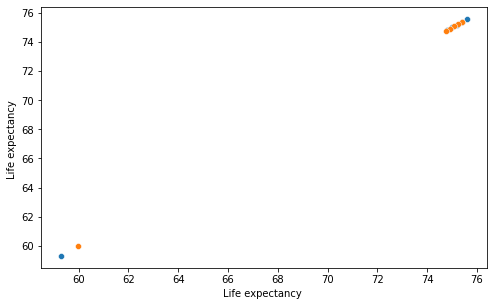

In [759]:
plt.figure(figsize=(8,4.8))
sns.scatterplot(x=y, y=y, data=testing,)
sns.scatterplot(x=y_test_pred, y=y_test_pred, data=testing)

 ___

# Thank You!